# Analysing the outcomes of Teqball rallies in singles and doubles

### Data Acquisition

##### Importing essentials


In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [380]:
df_singles = pd.read_excel("All_Data.xlsx")

In [381]:
df_doubles = pd.read_excel("Doubles_All_Data.xlsx")

In [382]:
df_singles.head()

,Date,Country,Competition name,Competition type,Court Type,Category,Competition Stage,Set number,Rally number,Player A,Player B,Serving Player,Service,Point for Player…,Point type
0,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,1.0,1,Apor Gyorgydeak,Hugo Rabeux,B,1,B,UE
1,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,1.0,2,Apor Gyorgydeak,Hugo Rabeux,B,1,A,UE
2,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,1.0,3,Apor Gyorgydeak,Hugo Rabeux,B,1,B,W
3,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,1.0,4,Apor Gyorgydeak,Hugo Rabeux,B,2,A,UE
4,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,1.0,5,Apor Gyorgydeak,Hugo Rabeux,A,2,B,UE


In [383]:
df_doubles.head()

,Date,Country,Competition name,Competition type,Court Type,Category,Competition Stage,Team A,Player B,Serving Team,Service,Point for Team…,Point type,Unnamed: 13
0,2021-05-02,Hungary,Budapest Challenger Cup,Challenger Cup,Indoor,Doubles (open),Group Stage,Adrian Duszak / Franczuk Bartlomiej,Adam Toronyi / Patrik Szatmari,B,1,A,UE,NaN
1,2021-05-02,Hungary,Budapest Challenger Cup,Challenger Cup,Indoor,Doubles (open),Group Stage,Adrian Duszak / Franczuk Bartlomiej,Adam Toronyi / Patrik Szatmari,B,1,B,UE,NaN
2,2021-05-02,Hungary,Budapest Challenger Cup,Challenger Cup,Indoor,Doubles (open),Group Stage,Adrian Duszak / Franczuk Bartlomiej,Adam Toronyi / Patrik Szatmari,B,1,A,UE,NaN
3,2021-05-02,Hungary,Budapest Challenger Cup,Challenger Cup,Indoor,Doubles (open),Group Stage,Adrian Duszak / Franczuk Bartlomiej,Adam Toronyi / Patrik Szatmari,B,2,A,FE,NaN
4,2021-05-02,Hungary,Budapest Challenger Cup,Challenger Cup,Indoor,Doubles (open),Group Stage,Adrian Duszak / Franczuk Bartlomiej,Adam Toronyi / Patrik Szatmari,A,1,B,UE,NaN


### Data Cleaning and Preprocessing

#### Uniformize two datasets for common analysis

In [384]:
# Remove df_doubles unnecessary columns
df_doubles.drop(columns='Unnamed: 13', inplace= True)

# Remove Set number and rally number column from df_singles as it will be not needed for the analysis
df_singles.drop(columns=['Set number', 'Rally number'], inplace = True)

##### Make the columns uniformal in both datasets


In [385]:
df_singles.columns

Index(['Date', 'Country', 'Competition name', 'Competition type', 'Court Type',
       'Category', 'Competition Stage', 'Player A', 'Player B',
       'Serving Player', 'Service', 'Point for Player…', 'Point type'],
      dtype='object')

In [386]:
df_doubles.columns

Index(['Date', 'Country', 'Competition name', 'Competition type', 'Court Type',
       'Category', 'Competition Stage', 'Team A', 'Player B', 'Serving Team',
       'Service', 'Point for Team…', 'Point type'],
      dtype='object')

In [387]:
df_singles.rename(columns={ 'Player A' : 'Team A',
                            'Player B' : 'Team B',
                            'Serving Player' : 'Serving Team',
                            'Point for Player…' : 'Point Winner'}, inplace = True)

In [388]:
df_doubles.rename(columns={'Player B' : 'Team B',
                           'Point for Team…' : 'Point Winner'}, inplace = True)

In [389]:
# Check if columns match
df_singles.columns == df_doubles.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [390]:
# Rename df_doubles 'Category' column values to from Doubles (open) to Doubles for simplicity
df_doubles['Category'] = 'Doubles'

In [391]:
# Merging the datasets
df = pd.concat([df_singles, df_doubles])

##### Finding and correcting mistakes - if the Server commits a Double Fault (DF), then the Server can not win the point

In [392]:
df.loc[(df['Serving Team'] == df['Point Winner']) & (df['Service'] == 'DF'), 'Point Winner']

1263    B
803     A
Name: Point Winner, dtype: object

In [393]:
df.loc[(df['Serving Team'] == df['Point Winner']) & (df['Service'] == 'DF'), 'Point Winner'] = df.loc[(df['Serving Team'] == df['Point Winner']) & (df['Service'] == 'DF'), 'Point Winner'].replace({
    'A': 'B',
    'B': 'A'
})

#### Exploring the Dataset

In [394]:
df.head()

,Date,Country,Competition name,Competition type,Court Type,Category,Competition Stage,Team A,Team B,Serving Team,Service,Point Winner,Point type
0,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,B,UE
1,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,A,UE
2,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,B,W
3,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,2,A,UE
4,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,A,2,B,UE


##### As all DF (Double Fault) services must be UEs (Unforced Error), make sure there are no mistakes like this

In [395]:
df['Point type'] = df.apply(lambda row: "UE" if (row['Service'] == "DF" and row['Point type'] != "UE") else row['Point type'], axis=1)

In [396]:
# Check unique values of Point type
df['Point type'].unique()

array(['UE', 'W', 'FE', 'E', 'w', 'Ue', 'ue', 'fe', 'e'], dtype=object)

In [397]:
df['Point type'] = df['Point type'].apply(lambda x : x.upper())

##### Check names as it becomes important when analysing the players

In [398]:
unique = df['Team A'].unique().tolist()
for name in df['Team B']:
    if name not in unique:
        unique.append(name)

unique.sort()

In [399]:
# Reorder names in case of doubles teams in alphabetical order and remove empty space before and after names
def reorder(name):
    if name.split('/')[0].strip().lower() > name.split('/')[1].strip().lower():
        name = name.split('/')[1].strip() + ' / ' + name.split('/')[0].strip()
    return name


In [400]:
df['Team A'] = df['Team A'].apply(lambda x : reorder(x) if '/' in x else x.strip())
df['Team B'] = df['Team B'].apply(lambda x : reorder(x) if '/' in x else x.strip())

### Exploratory Data Analysis

#### Differences in Point types between sand and indoor gameplay

In [401]:
df.head()

,Date,Country,Competition name,Competition type,Court Type,Category,Competition Stage,Team A,Team B,Serving Team,Service,Point Winner,Point type
0,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,B,UE
1,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,A,UE
2,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,1,B,W
3,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,B,2,A,UE
4,2021-04-04,Cape Verde,Cape Verde Challenger Cup,Challenger Cup,Sand,Singles,Semi Final,Apor Gyorgydeak,Hugo Rabeux,A,2,B,UE


In [402]:
sand_perc = np.round(df[df['Court Type'] == 'Sand']['Point type'].value_counts(normalize = True)*100,2).to_frame(name='Sand')
indoor_perc = np.round(df[df['Court Type'] != 'Sand']['Point type'].value_counts(normalize = True)*100,2).to_frame(name='Indoor')

In [403]:
sand_indoor = pd.concat([sand_perc, indoor_perc], axis = 1).reset_index().rename(columns = {'index' : 'Floor Type'})

In [404]:
sand_indoor

,Floor Type,Sand,Indoor
0,UE,51.72,43.91
1,FE,26.29,25.16
2,W,18.53,23.10
3,E,3.45,7.83


In [405]:
x =  pd.melt(sand_indoor, id_vars=['Floor Type'])

In [406]:
x

,Floor Type,variable,value
0,UE,Sand,51.72
1,FE,Sand,26.29
2,W,Sand,18.53
3,E,Sand,3.45
4,UE,Indoor,43.91
5,FE,Indoor,25.16
6,W,Indoor,23.10
7,E,Indoor,7.83


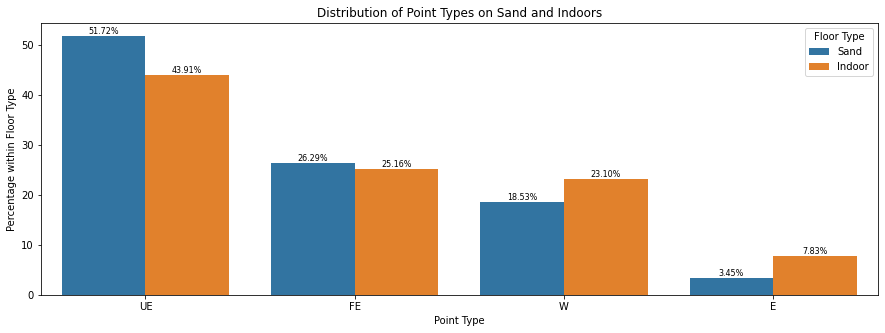

In [407]:
plt.figure(figsize=(15, 5))

sns.barplot(data=x, x='Floor Type', y='value', hue='variable')

# Add labels on top of the bars
ax = plt.gca()
ax.bar_label(ax.containers[-1], fmt='\n%.2f%%', label_type='edge', fontsize=8)
ax.bar_label(ax.containers[0], fmt='\n%.2f%%', label_type='edge', fontsize=8)
ax.legend(title = 'Floor Type')
plt.xlabel('Point Type')
plt.ylabel('Percentage within Floor Type')
plt.title('Distribution of Point Types on Sand and Indoors')
plt.show()

#### Analyzing the correlation between the successful service number and the point winner of the rallies 

In [409]:
df['Server Wins'] = np.where(df['Serving Team'] == df['Point Winner'], "Yes", "No")

In [412]:
df_serv = df.groupby(['Service', 'Server Wins']).count()['Date'].to_frame(name = "Count").reset_index()

###### Take out the Double Faults as they are not relevant here

In [413]:
df_serv = df_serv[df_serv['Service'] != "DF"]

In [414]:
df_serv['Percentage'] = np.round(100*df_serv['Count'] / df_serv.groupby('Service')['Count'].transform('sum'),2)

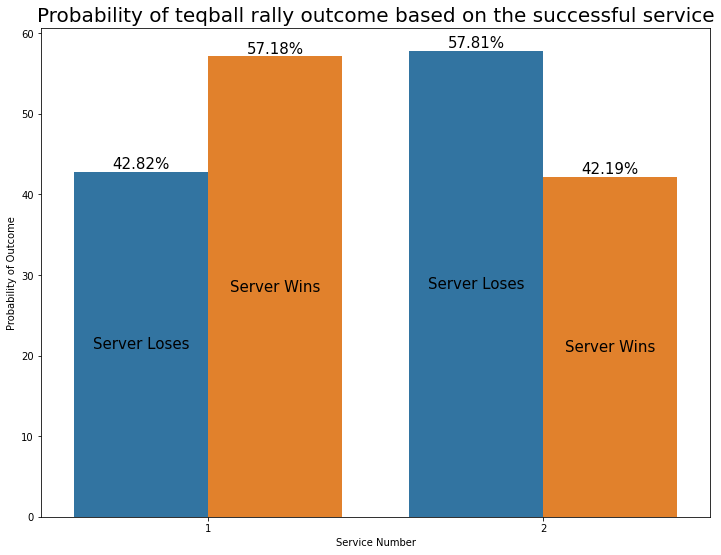

In [415]:
plt.figure(figsize=(12,9))

sns.barplot(data = df_serv, x = "Service", y = "Percentage", hue="Server Wins")

# Add labels on top of the bars
ax = plt.gca()
ax.bar_label(ax.containers[-1], fmt='\n%.2f%%', label_type='edge', fontsize=15)
ax.bar_label(ax.containers[-1], fmt='Server Wins', label_type='center', fontsize=15)
ax.bar_label(ax.containers[0], fmt='\n%.2f%%', label_type='edge', fontsize=15)
ax.bar_label(ax.containers[0], fmt='Server Loses', label_type='center', fontsize=15)

plt.xlabel('Service Number')
plt.ylabel('Probability of Outcome')
plt.title('Probability of teqball rally outcome based on the successful service', fontsize = 20)
plt.legend([], [], frameon=False)

plt.show()